In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

Даны два уравнения f(x)=0 и g(x)=0. Найти с точностью e=10^-10 все корни уравнений, содержащиеся на отрезке [a, b]. 

In [6]:
def f(x):
    return (np.cos(x))**2 + 2/35*np.cos(x) - 1/35

In [7]:
def g(x):
     return (np.cos(x))**2 - 2/7*np.cos(x) + 1/49

In [8]:
def illustrate_func(x_range, func):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.plot(x_range, func(x_range))

In [9]:
x = np.linspace(0.0, 2.0)

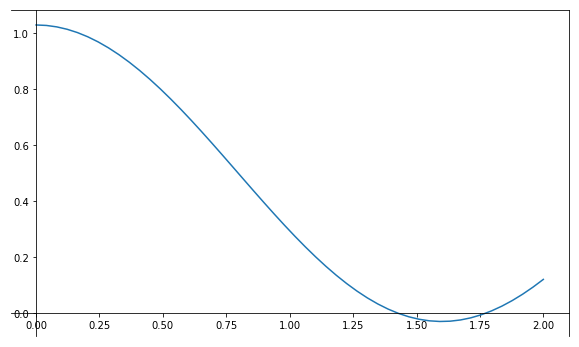

In [10]:
illustrate_func(x, f)

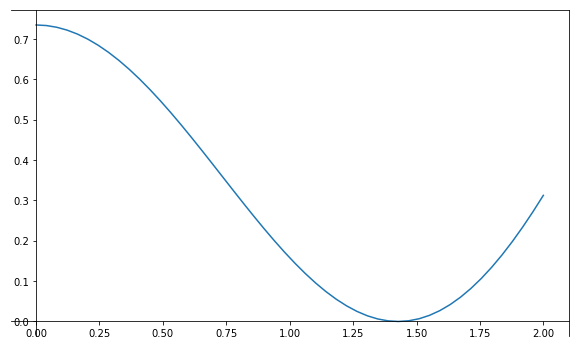

In [11]:
illustrate_func(x, g)

Два корня.<br> [a_1, b_1] = [1.0, 1.5] <br> [a_2, b_2] = [1.5, 2.0] 

## Bisection Method

In [12]:
def bisection(a_1, b_1, eps, h):
    # start data
    limit = 500
    count = 0
    x_1 = (a_1 + b_1)/2
    # check start data
    if abs(h(a_1)) < eps: 
        x = a_1
    elif abs(h(b_1)) < eps:
        x = b_1
    elif abs(h(x_1)) < eps:
        x = x_1
    # algorithm
    else:
        while (abs(h(x_1)) > eps and count < limit):
            if h(a_1)*h(x_1) < 0: # then x lies in [a_, x_]
                b_1 = x_1
                print(b_1)
            if h(b_1)*h(x_1) < 0: # then x lies in [x_, b_]
                a_1 = x_1
                print(a_1)
            x_1 = (a_1 + b_1) / 2
            count += 1
        x = x_1
        
    return x, count

### Root 1 f

In [13]:
print('Answer:', bisection(1.0, 1.5, 10**-10, f))

1.25
1.375
1.4375
1.40625
1.421875
1.4296875
1.42578125
1.427734375
1.4267578125
1.42724609375
1.427490234375
1.4273681640625
1.42742919921875
1.427459716796875
1.4274444580078125
1.4274520874023438
1.4274482727050781
1.427450180053711
1.4274492263793945
1.4274487495422363
1.4274489879608154
1.4274488687515259
1.427448809146881
1.4274487793445587
1.4274487644433975
1.427448756992817
1.4274487607181072
1.427448758855462
Answer: (1.4274487579241395, 28)


In [14]:
print('Answer:', bisection(1.5, 2.0, 10**-10, f))

1.75
1.875
1.8125
1.78125
1.765625
1.7734375
1.76953125
1.771484375
1.7724609375
1.77197265625
1.772216796875
1.7720947265625
1.77215576171875
1.772125244140625
1.7721405029296875
1.7721481323242188
1.7721519470214844
1.7721538543701172
1.7721548080444336
1.7721543312072754
1.7721540927886963
1.7721542119979858
1.7721542716026306
1.7721542418003082
1.7721542567014694
1.7721542492508888
1.7721542455255985
Answer: (1.7721542473882437, 27)


### Root g

In [15]:
print('Answer:', bisection(1.25, 1.5, 10**-10, g))

Answer: (1.375, 500)


G function has no roots

## Task 2

Найти указанный в варианте  корень уравнения f(x)=0 с точностью 10^-6,  двумя  способами.
1.      Использовать метод бисекции. Предварительно определить отрезок локализации  [a, b].
2.      Использовать метод Ньютона. В качестве начального приближения для метода Ньютона взять  середину отрезка локализации из п. 1.
      Сравнить число итераций в п. 2, 2.

In [16]:
def f_2(x):
    return np.exp(x + 1) * (x + 1) - x - 2

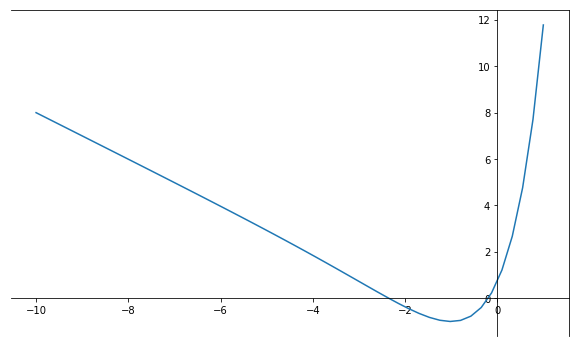

In [17]:
illustrate_func(np.linspace(-10, 1), f_2)

In [18]:
print('Answer:', bisection(-3, -2, 10**-6, f_2))

-2.5
-2.25
-2.375
-2.3125
-2.34375
-2.359375
-2.3515625
-2.34765625
-2.349609375
-2.3505859375
-2.35009765625
-2.349853515625
Answer: (-2.3499755859375, 12)


In [19]:
print('Answer:', bisection(-0.5, 0.0, 10**-6, f_2))

-0.25
-0.125
-0.1875
-0.21875
-0.203125
-0.1953125
-0.19140625
-0.193359375
-0.1943359375
-0.19384765625
-0.193603515625
-0.1934814453125
-0.19354248046875
-0.193511962890625
-0.1935272216796875
-0.19353485107421875
-0.19353103637695312
-0.19353294372558594
Answer: (-0.19353389739990234, 18)


In [22]:
from scipy.misc import derivative

## Newton's Method

In [23]:
def newtons(x_, eps, f):
    limit = 1000
    count = 0
    x = x_ - f(x_)/ derivative(f, x_)
    while (abs(x - x_) > eps and count < limit):
        x_ = x
        x = x_ - f(x_)/ derivative(f, x_)
        count += 1
    return x, count

In [24]:
print(newtons((-3.0 + -2.0) / 2, 10**-6, f_2))

(-2.3499765085218747, 5)


In [25]:
newtons((-0.5 + 0.0) / 2, 10**-6, f_2)

(-0.19353429800142155, 10)

## Task 3

Локализовать корни уравнения $f(x)=0$ и найти их с точностью $\varepsilon=10^{-5}$, используя метод простой итерации. К виду $x=\phi(x)$, удобному для итераций, уравнение f(x)=0 привести двумя способами.
1. Преобразовать уравнение к виду $x = x - \alpha x$, где $\alpha = 2 / (M + m)$, $(0 < m < f'(x) < M)$, а x принадлежит отрезку локализации $[a, \:b]$.
2. Любым  другим  преобразованием  уравнения. Проверить достаточное условие сходимости метода.
<br>Использовать критерий окончания итерационного процесса вида $|x^{n} - x^{n - 1}| < {(1 - q)\over q} \varepsilon$, где  в  п. 1 $q = {(M - m) \over (M + m)}$ и в п. 2 $q = \max\limits_{x \in [a, \:b]}{|\phi'(x)|}$

In [28]:
def f_3(x):
    return (x-1)*np.sinh(x+1) - x

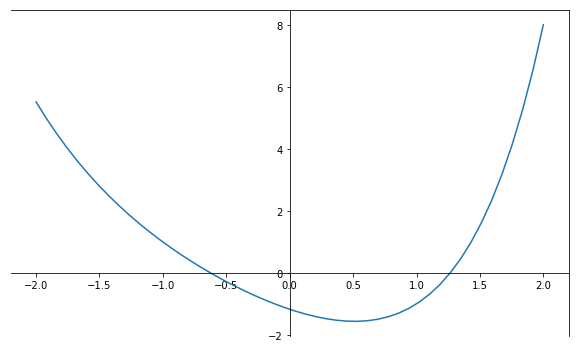

In [30]:
illustrate_func(np.linspace(-2, 2), f_3)

In [34]:
a_1 = -1.0
b_1 = 0.0

a_2 = 1.0
b_2 = 1.5

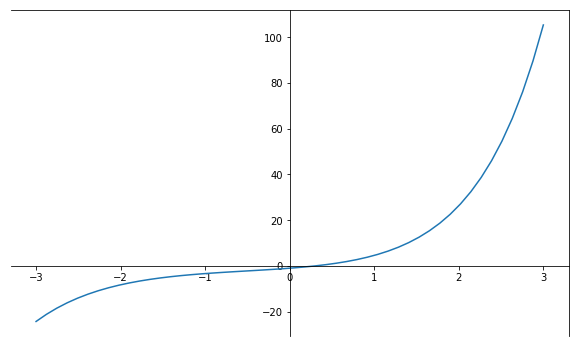

In [33]:
def f_4(x):
    return derivative(f_3, x)
illustrate_func(np.linspace(-3, 3), f_4)

In [ ]:
np.max(f_4(b_1))